# Estimadores de máxima verosimilitud: Repaso

![MLE](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/MLfunctionbinomial-en.svg/600px-MLfunctionbinomial-en.svg.png)

> La estimación por máxima verosimilitud (maximum likelihood estimation - MLE) es uno de los métodos más utilizados para estimar los parámetros de un modelo.

> La idea básica, es elegir los parámetros que maximizan la función de verosimilitud. Intuitivamente, esto corresponde a elegir los parámetros que maximizan la probabilidad de los datos observados.

Referencia:

- https://www.univ-orleans.fr/deg/masters/ESA/CH/Chapter2_MLE.pdf

## 1. Principios básicos

**Retomamos el ejemplo de la moneda**.

Definimos la variable aleatoria (discreta) binomial:

$$
X = \left\{ \begin{array}{ccc} 1 & \text{si} & \text{la moneda cae cara} \\
                               0 & \text{si} & \text{la moneda cae sello} \end{array} \right.
$$

con función de masa de probabilidad dada por:

- $P(X=1) = P(X=1 | \theta) = \theta$;
- $P(X=0) = P(X=0 | \theta) = 1 - P(X=1) = 1 - \theta$.

Ahora, suponemos que $X_1, X_2, \dots, X_N$ representan las variables aleatorias correspondientes a $N$ tiros de la moneda. Estas variables aleatorias son **independientes**, e **idénticamente distribuidas** (i.i.d.).

> En muchos contextos (incluidas las aplicaciones de aprendizaje de máquinas) se supone que las diferentes observaciones de los datos son i.i.d.

Ahora, ¿cuál es la probabilida de observar determinada sucesión de resultados de tiros de la moneda suponiendo que esta sigue la distribución de probabilidad dada arriba?

Supongamos que observamos $\{x_1, x_2, \dots, x_N\}$, donde $x_i = 0, 1$ para todo $i=1, \dots, N$. Queremos entonces averiguar la probabilidad:

$$
P(X_1=x_1, X_2=x_2, \dots, X_N=x_N | \theta)
$$

> Esta probabilidad es una función del parámetro $\theta$ (desconocido) y corresponde a la **verosimilitud de la muestra** $\{x_1, x_2, \dots, x_N\}$, la cual denotamos por:
  
  $$
  \mathcal{L}(\theta; x_1, x_2, \dots, x_N) = P(X_1=x_1, X_2=x_2, \dots, X_N=x_N | \theta).
  $$

Como suponemos que las variables son **independientes**, tenemos que:

\begin{align}
\mathcal{L}(\theta; x_1, x_2, \dots, x_N) & = P(X_1=x_1, X_2=x_2, \dots, X_N=x_N | \theta) \\
                                          & = P(X_1=x_1 | \theta) P(X_2=x_2| \theta) \dots P(X_N=x_N | \theta) \\
                                          & = \prod_{j=1}^{N} P(X_j = x_j | \theta).
\end{align}

Ahora, analicemos el término $P(X_j = x_j | \theta)$. ¿Qué posibles valores puede tomar?

$$
P(X_j = x_j | \theta) = \left\{ \begin{array}{ccc} \theta   & \text{si} & x_j=1 \\
                                                   1-\theta & \text{si} & x_j=0 \end{array} \right.
$$

De modo que la función de verosimilitud solo depende de cuantas veces de los $N$ tiros cayó cara, y cuantas veces de los $N$ tiros cayó sello.

Denotemos por:

- $N_0$: Número de veces que cayó sello.

- $N_1$: Número de veces que cayó cara.

Se debe satisfacer, claramente, que $N_0 + N_1 = N$.

De esta manera:

$$
\mathcal{L}(\theta; x_1, x_2, \dots, x_N) = \theta^{N_1} (1 - \theta)^{N_0}.
$$

**Ejemplo:**

Supongamos que tiramos la moneda 10 veces, y obtenemos:

$$
\{0, 0, 1, 0, 1, 1, 1, 1, 0, 1\}
$$

En este caso:
- $N_0 = 4$
- $N_1 = 6$

Una idea razonable es encontrar $\theta$ de manera que **la función verosimilitud sea máxima**, o equivalentemente, tal que **se maximice la probabilidad de la muestra observada**.

In [1]:
# Importamos numpy
import numpy as np
# Importamos matplotlib.pyplot
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Calculamos la función de verosimilitud con los datos del ejemplo
N0 = 4
N1 = 6
theta = np.linspace(0, 1, 101)
L = theta**N1 * (1 - theta)**N0

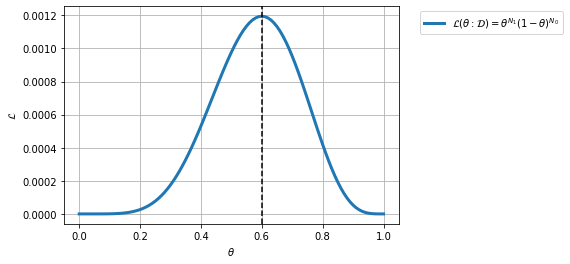

In [4]:
# Dibujamos la función de verosimilitud
plt.figure(figsize=(6, 4))
plt.plot(theta, L, lw=3, label=r'$\mathcal{L}(\theta: \mathcal{D})=\theta^{N_1}(1-\theta)^{N_0}$')
plt.grid()
plt.axvline(x=theta[L.argmax()], c='k', ls='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathcal{L}$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

In [5]:
# Aproximamos el valor máximo de la verosimilitud
theta[L.argmax()]

0.6

¿Cuál es el valor óptimo para $\theta$?

- Como dicta la intuición es ...

Entonces, lo que nos dice el principio de máxima verosimilitud es: elegir $\theta$ tal que

$$
\hat{\theta}_{MLE} = \arg \max_{\theta} \mathcal{L}(\theta; x_1, x_2, \dots, x_N) = \theta^{N_1} (1 - \theta)^{N_0}.
$$

### Truco común:

- El logaritmo (natural) es una función creciente y cóncava.
  - Por tanto,
    
    $$
    \arg \max_{\theta} \mathcal{L}(\theta; x_1, x_2, \dots, x_N) = \arg \max_{\theta} \underbrace{\log \mathcal{L}(\theta; x_1, x_2, \dots, x_N)}_{l(\theta; x_1, x_2, \dots, x_N): \text{ log-verosimilitud}}
    $$
    
- La **log-verosimilitud** ofrece la ventaja de convertir las multiplicaciones en sumas:
  
  \begin{align}
  l(\theta; x_1, x_2, \dots, x_N) & = \log \mathcal{L}(\theta; x_1, x_2, \dots, x_N) \\
                                  & = \log \left(\theta^{N_1} (1 - \theta)^{N_0} \right) \\
                                  & = N_1 \log \theta + N_0 \log(1 - \theta).
  \end{align}
  
  y en general, las sumas son más fáciles de derivar (y maximizar) que los productos.
  
> En general, la función de verosimilitud para muestras i.i.d. es:
> 
> $$
  \mathcal{L}(\theta; x_1, x_2, \dots, x_N) = \prod_{j=1}^{N} P(X_j = x_j | \theta)
  $$
>  
> de manera que la log-verosimilitud será:
>
> $$
  \mathcal{l}(\theta; x_1, x_2, \dots, x_N) = \sum_{j=1}^{N} \log P(X_j = x_j | \theta)
  $$

<font color=green> Maximizar la log-verosimilitud para el ejemplo de la moneda en el pizarrón. </font>

## 2. Estimación de máxima verosimilitud en una distribución normal

En este caso tenemos:

- Variable aleatoria $X \sim \mathcal{N}(\mu, \sigma^2)$.

- $p(x;\mu,\sigma^2)=\frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$.

Suponemos que las observaciones

$$\mathcal{D} = \{x_1, \dots, x_N\}$$

son independientes e idénticamente distribuidas.

Mostrar que los estimadores de máxima verosimilitud de $\mu$ y $\sigma$ son:

$$\hat{\mu} = \frac{1}{M} \sum_{j=1}^{M}x[j] \qquad \text{y} \qquad \hat{\sigma}=\sqrt{\frac{1}{M}\sum_{j=1}^{M}(x[j]-\hat{\mu})^2}.$$

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>